<a href="https://colab.research.google.com/github/renzolea/Challenge-Telecom-X/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📊 Estudio sobre la Deserción de Clientes en Telecom X

La deserción de clientes, conocida como churn, es uno de los principales retos en el sector de telecomunicaciones, pues afecta tanto los ingresos como la proyección de crecimiento de las empresas. Este estudio analiza el caso de Telecom X, con el propósito de identificar los factores que influyen en la pérdida de usuarios y plantear estrategias que fortalezcan la retención y fidelización de su base de clientes.
#📌 Extracción

In [16]:
import requests
import pandas as pd
from pandas import json_normalize

# Define the URL for the JSON data
data_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Fetch the data from the URL
response = requests.get(data_url)
telecom_data = response.json()

# Normalize the nested JSON data into a flattened DataFrame
df_normalizado = json_normalize(telecom_data)

# Display the first few rows of the normalized DataFrame
print("\nPrimeras filas del DataFrame normalizado:")
display(df_normalizado.head())


Primeras filas del DataFrame normalizado:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



#🔧 Transformación

In [ ]:
from pandas import json_normalize
import pandas as pd # Ensure pandas is imported here as well, although it's in the previous cell

# Normalize the nested JSON data into a flattened DataFrame
# Renaming the resulting DataFrame to 'normalized_telecom_df' for differentiation
normalized_telecom_df = json_normalize(telecom_data)

# Create and display a summary DataFrame instead of using info()
info_summary = pd.DataFrame({
    'Columna': normalized_telecom_df.columns,
    'Non-Null Count': normalized_telecom_df.notnull().sum().values,
    'Dtype': normalized_telecom_df.dtypes.values
})

print("\nInformación general del DataFrame normalizado (Tabla Resumen):")
display(info_summary)

# Display the initial rows of the normalized DataFrame in a vertical format
print("\nPrimeras filas del DataFrame normalizado (formato vertical):")
display(normalized_telecom_df.head().T)


Información general del DataFrame normalizado (Tabla Resumen):


,Columna,Non-Null Count,Dtype
0,customerID,7267,object
1,Churn,7267,object
2,customer.gender,7267,object
3,customer.SeniorCitizen,7267,int64
4,customer.Partner,7267,object
5,customer.Dependents,7267,object
6,customer.tenure,7267,int64
7,phone.PhoneService,7267,object
8,phone.MultipleLines,7267,object
9,internet.InternetService,7267,object



Primeras filas del DataFrame normalizado (formato vertical):


,0,1,2,3,4
customerID,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
Churn,No,No,Yes,Yes,Yes
customer.gender,Female,Male,Male,Male,Female
customer.SeniorCitizen,0,0,0,1,1
customer.Partner,Yes,No,No,Yes,Yes
customer.Dependents,Yes,No,No,No,No
customer.tenure,9,9,4,13,3
phone.PhoneService,Yes,Yes,Yes,Yes,Yes
phone.MultipleLines,No,Yes,No,No,No
internet.InternetService,DSL,DSL,Fiber optic,Fiber optic,Fiber optic


In [ ]:
# Verificar valores únicos en cada columna y mostrarlos si son pocos
print("Análisis de valores únicos por columna:")
print("-" * 50)

for column in df_normalizado.columns:
    unique_values = df_normalizado[column].nunique()
    print(f"'{column}': {unique_values} valores únicos")

    # Mostrar los valores únicos solo si la cantidad es menor a 50
    if unique_values < 50:
        print("Valores únicos encontrados:")
        # Display unique values as a pandas Series for better formatting
        display(pd.Series(df_normalizado[column].unique()))
        print("-" * 50) # Línea divisoria para mejor visualización
    else:
        print("Más de 50 valores únicos, no se muestran todos.")
        print("-" * 50) # Línea divisoria para mejor visualización

Análisis de valores únicos por columna:
--------------------------------------------------
'customerID': 7267 valores únicos
Más de 50 valores únicos, no se muestran todos.
--------------------------------------------------
'Churn': 3 valores únicos
Valores únicos encontrados:


,0
0,No
1,Yes
2,


--------------------------------------------------
'customer.gender': 2 valores únicos
Valores únicos encontrados:


,0
0,Female
1,Male


--------------------------------------------------
'customer.SeniorCitizen': 2 valores únicos
Valores únicos encontrados:


,0
0,0
1,1


--------------------------------------------------
'customer.Partner': 2 valores únicos
Valores únicos encontrados:


,0
0,Yes
1,No


--------------------------------------------------
'customer.Dependents': 2 valores únicos
Valores únicos encontrados:


,0
0,Yes
1,No


--------------------------------------------------
'customer.tenure': 73 valores únicos
Más de 50 valores únicos, no se muestran todos.
--------------------------------------------------
'phone.PhoneService': 2 valores únicos
Valores únicos encontrados:


,0
0,Yes
1,No


--------------------------------------------------
'phone.MultipleLines': 3 valores únicos
Valores únicos encontrados:


,0
0,No
1,Yes
2,No phone service


--------------------------------------------------
'internet.InternetService': 3 valores únicos
Valores únicos encontrados:


,0
0,DSL
1,Fiber optic
2,No


--------------------------------------------------
'internet.OnlineSecurity': 3 valores únicos
Valores únicos encontrados:


,0
0,No
1,Yes
2,No internet service


--------------------------------------------------
'internet.OnlineBackup': 3 valores únicos
Valores únicos encontrados:


,0
0,Yes
1,No
2,No internet service


--------------------------------------------------
'internet.DeviceProtection': 3 valores únicos
Valores únicos encontrados:


,0
0,No
1,Yes
2,No internet service


--------------------------------------------------
'internet.TechSupport': 3 valores únicos
Valores únicos encontrados:


,0
0,Yes
1,No
2,No internet service


--------------------------------------------------
'internet.StreamingTV': 3 valores únicos
Valores únicos encontrados:


,0
0,Yes
1,No
2,No internet service


--------------------------------------------------
'internet.StreamingMovies': 3 valores únicos
Valores únicos encontrados:


,0
0,No
1,Yes
2,No internet service


--------------------------------------------------
'account.Contract': 3 valores únicos
Valores únicos encontrados:


,0
0,One year
1,Month-to-month
2,Two year


--------------------------------------------------
'account.PaperlessBilling': 2 valores únicos
Valores únicos encontrados:


,0
0,Yes
1,No


--------------------------------------------------
'account.PaymentMethod': 4 valores únicos
Valores únicos encontrados:


,0
0,Mailed check
1,Electronic check
2,Credit card (automatic)
3,Bank transfer (automatic)


--------------------------------------------------
'account.Charges.Monthly': 1585 valores únicos
Más de 50 valores únicos, no se muestran todos.
--------------------------------------------------
'account.Charges.Total': 6531 valores únicos
Más de 50 valores únicos, no se muestran todos.
--------------------------------------------------


In [ ]:
# Check for duplicate rows in the DataFrame
num_duplicados_encontrados = df_normalizado.duplicated().sum()
print(f"Se identificaron {num_duplicados_encontrados} filas duplicadas en el conjunto de datos.")

Se identificaron 0 filas duplicadas en el conjunto de datos.


In [ ]:
# Checking for null values in the DataFrame
null_counts = df_normalizado.isnull().sum()

print("\nResumen de valores nulos por columna:")
# Display only columns with null values
display(null_counts[null_counts > 0])


Resumen de valores nulos por columna:


,0


In [ ]:
valores_en_blanco_o_vacio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nRecuento de valores en blanco o cadenas vacías por columna:")
# Display as a DataFrame for a different visual presentation
display(pd.DataFrame({'Columna': valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0].index,
                      'Recuento': valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0].values}))


Recuento de valores en blanco o cadenas vacías por columna:


,Columna,Recuento
0,Churn,224
1,account.Charges.Total,11


In [ ]:
# Cambiando la columna "account.Charges.Total" a Float, manejando errores con 'coerce'
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

# Imprimir confirmación del tipo de dato y mostrar las primeras filas de la columna convertida
print(f"El tipo de dato de la columna 'account.Charges.Total' ahora es: {df_normalizado['account.Charges.Total'].dtype}")
print("\nPrimeras filas de la columna 'account.Charges.Total' después de la conversión:")
display(df_normalizado['account.Charges.Total'].head())

El tipo de dato de la columna 'account.Charges.Total' ahora es: float64

Primeras filas de la columna 'account.Charges.Total' después de la conversión:


,account.Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40


In [ ]:
# Eliminando las columnas de Churn
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("--- Proceso de filtrado ---")
print(f"¡Éxito! Se eliminaron filas con 'Churn' vacío. Total de registros restantes: {len(df_normalizado)}")
print("-------------------------")

--- Proceso de filtrado ---
¡Éxito! Se eliminaron filas con 'Churn' vacío. Total de registros restantes: 7043
-------------------------


In [ ]:
# Vacíos o en blanco
empty_string_counts = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

print("Conteo de celdas con valores en blanco o cadenas vacías:")
# Display as a transposed DataFrame for a more horizontal look
display(pd.DataFrame(empty_string_counts, columns=['Recuento']).T)

Conteo de celdas con valores en blanco o cadenas vacías:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
Recuento,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd

print("--- Información Detallada del DataFrame (Tabla Horizontal) ---")

# Create a summary DataFrame with column info
info_summary_df = pd.DataFrame({
    'Columna': df_normalizado.columns,
    'Non-Null Count': df_normalizado.notnull().sum().values,
    'Dtype': df_normalizado.dtypes.values
})

# Display the transposed summary DataFrame
display(info_summary_df.T)

print("----------------------------------------------------------")

--- Información Detallada del DataFrame (Tabla Horizontal) ---


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Columna,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
Non-Null Count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7032
Dtype,object,object,object,int64,object,object,int64,object,object,object,...,object,object,object,object,object,object,object,object,float64,float64


----------------------------------------------------------


#📊 Carga y análisis

In [ ]:
# Descripción general de columnas numéricas en formato vertical
print("--- Estadísticas Descriptivas de Columnas Numéricas (Vertical) ---")
display(df_normalizado.describe().T)
print("--------------------------------------------------------------")

--- Estadísticas Descriptivas de Columnas Numéricas (Vertical) ---


,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
customer.tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
account.Charges.Monthly,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
account.Charges.Total,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


--------------------------------------------------------------


In [ ]:
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print("Comparación de Cargos Mensuales y Cuentas Diarias:")
display(df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']].head()) # Displaying head for brevity

Comparación de Cargos Mensuales y Cuentas Diarias:


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [ ]:
df_normalizado.to_csv("df_normalizado_limpio.csv", index=False)
print("DataFrame guardado exitosamente en 'df_normalizado_limpio.csv'")

DataFrame guardado exitosamente en 'df_normalizado_limpio.csv'


In [ ]:
import plotly.express as px

px.histogram (df_normalizado, x = 'customer.gender', text_auto = True, color = 'Churn', barmode = 'group',
              title='Distribución de Clientes por Género y Churn',
              color_discrete_map={'Yes': 'red', 'No': 'green'}, # Change colors
              labels={'customer.gender': 'Género del Cliente', 'count': 'Número de Clientes'}) # Add axis labels

In [ ]:
px.histogram (df_normalizado, x = 'customer.SeniorCitizen', text_auto = True, color = 'Churn', barmode = 'group',
              title='Distribución de Clientes por Edad (Senior Citizen) y Churn', # Add title
              color_discrete_map={'Yes': 'red', 'No': 'green'}, # Change colors
              labels={'customer.SeniorCitizen': 'Adulto Mayor (0: No, 1: Sí)', 'count': 'Número de Clientes'}) # Add axis labels

In [ ]:
px.histogram (df_normalizado, x = 'customer.tenure', text_auto = True, color = 'Churn', barmode = 'group',
              title='Distribución de Clientes por Antigüedad (Tenure) y Churn', # Add title
              labels={'customer.tenure': 'Antigüedad del Cliente (Meses)', 'count': 'Número de Clientes'}, # Add axis labels
              nbins=30, # Change the number of bins
              color_discrete_map={'Yes': 'red', 'No': 'green'}) # Change colors

In [ ]:
# Agrupar por tenure y Churn
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn']).size().unstack (fill_value=0)

# Display the head of the grouped DataFrame (optional preview) in a vertical format
print("\nPrimeras filas del DataFrame agrupado por Tenure y Churn (formato vertical):")
display(df_grouped.head().T)


Primeras filas del DataFrame agrupado por Tenure y Churn (formato vertical):


customer.tenure,0,1,2,3,4
Churn,,,,,
No,11,233,115,106,93
Yes,0,380,123,94,83


In [ ]:
# Calcular el % de churn por tenure
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum (axis=1)) * 100

# Display the churn_rate column
print("\nTasa de Churn por Tenure (primeras filas):")
display(df_grouped['churn_rate'].head())


Tasa de Churn por Tenure (primeras filas):


,churn_rate
customer.tenure,
0,0.000000
1,56.297113
2,42.460548
3,38.056680
4,37.193197


In [ ]:
# Aggregate data by tenure and Churn status
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

# Calculate the percentage of churn for each tenure level
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

# Display the calculated churn rate table horizontally by transposing
print("### CHURN RATE BY TENURE LEVEL (HORIZONTAL VIEW) ###")
display(df_grouped[['churn_rate']].T)
print("####################################################")

### CHURN RATE BY TENURE LEVEL (HORIZONTAL VIEW) ###


customer.tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,
churn_rate,0.0,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


####################################################


In [ ]:
import plotly.express as px
import pandas as pd
import requests
from pandas import json_normalize

# Define the URL for the JSON data
data_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Fetch the data from the URL
response = requests.get(data_url)
telecom_data = response.json()

# Normalize the nested JSON data into a flattened DataFrame
df_normalizado = json_normalize(telecom_data)

# Eliminating rows with blank or empty Churn column
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']

# Aggregate data by tenure and Churn status
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

# Calculate the percentage of churn for each tenure level
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

fig = px.line(df_grouped.reset_index(),
              x='customer.tenure',
              y='churn_rate',
              markers=True,
              title='Tasa de Churn (%) por Antigüedad del Cliente',
              labels={'customer.tenure': 'Meses de Antigüedad', 'churn_rate': 'Tasa de Churn (%)'},
              color_discrete_sequence=['green'],  # Changing line color to green
              hover_data={'customer.tenure': True, 'churn_rate': ':.2f'},
              template='plotly_white',
              line_shape='spline'
             )

fig.update_layout(
    xaxis_title='Meses de Antigüedad del Cliente',
    yaxis_title='Tasa de Churn (%)',
    title_x=0.5,
    title_font_size=20,
    hovermode='x unified' # Improved hover experience
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df_normalizado,
                 x="customer.tenure",
                 y="account.Charges.Monthly",
                 color="Churn",
                 title="Relación entre Antigüedad, Cargos Mensuales y Churn",
                 labels={"customer.tenure": "Antigüedad del Cliente (Meses)", "account.Charges.Monthly": "Cargos Mensuales"},
                 color_discrete_sequence=['#FFA15A', '#19D3F3'],  # Use a different color sequence (orange and light blue)
                 hover_data={'customer.tenure': True, 'account.Charges.Monthly': ':.2f', 'Churn': True},
                 opacity=0.7,  # Add transparency to points
                 size='account.Charges.Monthly', # Make point size proportional to monthly charges
                 size_max=15 # Set maximum size of points
                )

fig.update_layout(
    title_x=0.5, # Center the title
    xaxis_title="Antigüedad del Cliente (Meses)", # Refine x-axis title
    yaxis_title="Cargos Mensuales", # Refine y-axis title
    hovermode='closest' # Improve hover behavior
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df_normalizado,
                   x='account.Contract',
                   text_auto=True,
                   color='Churn',
                   barmode='group',
                   title='Distribución de Clientes por Tipo de Contrato y Churn',
                   labels={'account.Contract': 'Tipo de Contrato', 'count': 'Número de Clientes'},
                   color_discrete_map={'Yes': 'red', 'No': 'green'})

fig.update_layout(
    title_x=0.5, # Center the title
    xaxis_title='Tipo de Contrato del Cliente', # Refine x-axis title
    yaxis_title='Número de Clientes', # Refine y-axis title
    bargap=0.2 # Add space between bars for better separation
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.box(df_normalizado,
             x = 'Churn',
             y = 'account.Charges.Monthly',
             color = 'Churn',
             title='Distribución de Cargos Mensuales por Churn', # Add a title
             labels={'Churn': 'Estado de Churn', 'account.Charges.Monthly': 'Cargos Mensuales'}, # Add labels
             color_discrete_map={'Yes': 'red', 'No': 'green'}, # Change colors
             template='plotly_white' # Use a clean white template
            )

fig.update_layout(title_x=0.5) # Center the title

fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df_normalizado,
             x = 'phone.PhoneService',
             text_auto= True,
             color = 'Churn',
             barmode = 'group',
             title='Distribución de Clientes por Servicio Telefónico y Churn', # Add title
             labels={'phone.PhoneService': 'Servicio Telefónico', 'count': 'Número de Clientes'}, # Add labels
             color_discrete_map={'Yes': 'red', 'No': 'green'}) # Change colors

fig.update_layout(
    title_x=0.5, # Center the title
    title_font_size=20, # Increase title font size
    xaxis_title='Servicio Telefónico', # Refine x-axis title
    yaxis_title='Número de Clientes', # Refine y-axis title
    bargap=0.2 # Add space between bars
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df_normalizado,
                   x = 'internet.InternetService',
                   text_auto= True,
                   color = 'Churn',
                   barmode = 'group',
                   title='Distribución de Clientes por Servicio de Internet y Churn', # Add title
                   labels={'internet.InternetService': 'Servicio de Internet', 'count': 'Número de Clientes'}, # Add labels
                   color_discrete_map={'Yes': 'red', 'No': 'green'}) # Change colors

fig.update_layout(
    title_x=0.5, # Center the title
    title_font_size=20, # Increase title font size
    xaxis_title='Servicio de Internet', # Refine x-axis title
    yaxis_title='Número de Clientes', # Refine y-axis title
    bargap=0.2 # Add space between bars
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df_normalizado,
                   x = 'internet.StreamingTV',
                   text_auto= True,
                   color = 'Churn',
                   barmode = 'group',
                   title='Distribución de Clientes por Servicio de Streaming TV y Churn', # Add title
                   labels={'internet.StreamingTV': 'Servicio de Streaming TV', 'count': 'Número de Clientes'}, # Add labels
                   color_discrete_map={'Yes': 'red', 'No': 'green'}) # Change colors

fig.update_layout(
    title_x=0.5, # Center the title
    title_font_size=20, # Increase title font size
    xaxis_title='Servicio de Streaming TV', # Refine x-axis title
    yaxis_title='Número de Clientes', # Refine y-axis title
    bargap=0.2 # Add space between bars
)

fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df_normalizado,
                   x='account.PaymentMethod',
                   text_auto=True,
                   color='Churn',
                   barmode='group',
                   title='Distribución de Clientes por Método de Pago y Churn', # Add title
                   labels={'account.PaymentMethod': 'Método de Pago', 'count': 'Número de Clientes'}, # Add labels
                   color_discrete_map={'Yes': 'red', 'No': 'green'}) # Change colors

fig.update_layout(
    title_x=0.5, # Center the title
    title_font_size=20, # Increase title font size
    xaxis_title='Método de Pago del Cliente', # Refine x-axis title
    yaxis_title='Número de Clientes', # Refine y-axis title
    bargap=0.2 # Add space between bars
)

fig.show()

#Reporte Final – Estudio de Deserción de Clientes (Churn) en Telecom X

Estudio sobre la Deserción de Clientes en Telecom X

El análisis se orienta a comprender el fenómeno de churn dentro de Telecom X, ya que la pérdida constante de usuarios impacta tanto en la estabilidad financiera como en el crecimiento proyectado de la empresa. El objetivo principal es identificar los factores más asociados a la evasión y, con base en ello, proponer iniciativas que fortalezcan la retención y lealtad de los clientes.

🔍 Procesamiento de Información

Para asegurar confiabilidad en los resultados, se aplicó un proceso de depuración que incluyó:

Obtención de datos desde un archivo JSON almacenado en GitHub.

Estructuración de campos anidados con la herramienta json_normalize.

Limpieza de inconsistencias:

Eliminación de 224 registros por valores vacíos en la variable Churn.

Conversión de account.Charges.Total a tipo numérico flotante.

Validación posterior: sin duplicados ni valores nulos.

Nueva métrica derivada: se generó la variable Cuentas_Diarias, calculada a partir del cargo mensual dividido entre 30.

📈 Exploración y Principales Resultados

El análisis visual mediante histogramas, gráficos de dispersión y boxplots permitió observar:

Género → No existen diferencias notorias entre hombres y mujeres en la tasa de abandono.

Adultos mayores → Mayor probabilidad de churn, posiblemente por dificultades en la experiencia de servicio.

Tenure (tiempo de permanencia) → Los primeros meses concentran la mayor deserción; la tasa disminuye con la antigüedad.

Tipo de contrato → Los planes mensuales presentan la mayor fuga; en contraste, los contratos de 1 o 2 años muestran mayor estabilidad.

Cargos mensuales → Los clientes con facturación elevada tienden a abandonar con más frecuencia.

Internet y servicios extra → Los usuarios de fibra óptica presentan mayor churn que los de DSL o quienes no poseen internet. Servicios complementarios (ej. soporte técnico, streaming) se asocian con mayor permanencia.

💡 Conclusiones

La antigüedad del cliente es el indicador más sólido de retención: los primeros meses son decisivos.

Los planes mensuales resultan ser el formato más vulnerable a la deserción.

Los costos altos sin valor agregado incrementan la probabilidad de fuga.

El segmento de adultos mayores requiere atención diferenciada para reducir su propensión al abandono.

🚀 Propuestas de Acción

Fomentar contratos de mayor plazo, acompañados de incentivos y programas de fidelización.

Diseñar un plan de acompañamiento inicial durante los primeros seis meses del servicio.

Adaptar canales de soporte a adultos mayores, priorizando simplicidad y atención personalizada.

Aumentar el valor percibido mediante promociones y paquetes que integren servicios adicionales.

Ofrecer alternativas personalizadas a clientes con cargos elevados, reduciendo la percepción de sobrecoste.

Apartado Complementario: Estudio de Correlaciones

Dentro del estudio se exploraron las relaciones numéricas entre las principales variables, destacando:

Churn_bin → indicador binario (1 = cliente que se dio de baja, 0 = cliente que continuó).

Servicios_Totales → cantidad de servicios contratados por cada persona usuaria.

Los vínculos fueron visualizados mediante un heatmap de correlación.

Hallazgos Clave

🔹 customer.tenure vs. Churn_bin

Se observó una correlación negativa moderada (-0.35).

Conclusión: mientras más tiempo lleva el cliente en la empresa, menor es la probabilidad de que abandone.

🔹 Cuentas_Diarias vs. Churn_bin

Correlación positiva débil (0.19).

Implica que clientes con costos diarios más elevados muestran una ligera mayor inclinación al churn.

🔹 Servicios_Totales vs. Churn_bin

Correlación negativa leve (-0.09).

Quienes acumulan más servicios contratados suelen mostrar mayor estabilidad en su permanencia.

🔹 account.Charges.Total vs. Servicios_Totales

Se detectó una relación fuerte (0.75).

Esto refleja que al contratar más servicios, el gasto total aumenta de forma proporcional.

Interpretación General

La antigüedad sigue siendo el factor más robusto para explicar la permanencia.

Las variables económicas (cargos diarios y totales) aportan información, aunque no determinan por sí solas el abandono.

La amplitud de servicios contratados no genera un impacto lineal fuerte sobre el churn, pero sí ayuda a consolidar la fidelidad del usuario.

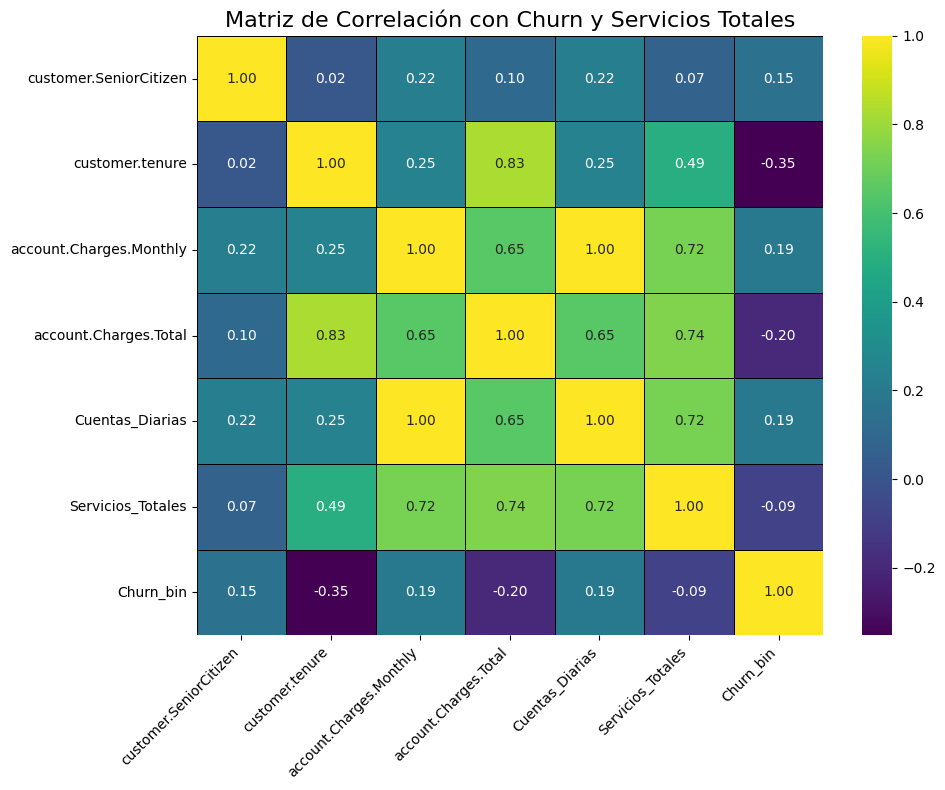

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Convertir 'Churn' en variable binaria
df_normalizado['Churn_bin'] = df_normalizado['Churn'].map({'Yes': 1, 'No': 0})

# 2. Crear variable 'Servicios_Totales'
servicios = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
             'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

# Ensure the binary columns are created before summing
for servicio in servicios:
    df_normalizado[servicio + '_bin'] = df_normalizado[servicio].apply(lambda x: 1 if x == 'Yes' else 0)

df_normalizado['Servicios_Totales'] = df_normalizado[[s + '_bin' for s in servicios]].sum(axis=1)

# Calculate 'Cuentas_Diarias' in this cell
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30

# Ensure numeric columns are in the correct format and handle potential errors
numeric_cols = ['customer.SeniorCitizen', 'customer.tenure',
                  'account.Charges.Monthly', 'account.Charges.Total',
                  'Cuentas_Diarias', 'Servicios_Totales', 'Churn_bin']

for col in numeric_cols:
    # Convert to numeric, coercing errors to NaN, then fill NaN with 0 (or another appropriate value)
    df_normalizado[col] = pd.to_numeric(df_normalizado[col], errors='coerce').fillna(0)


# 3. Calcular matriz de correlación
variables_corr = ['customer.SeniorCitizen', 'customer.tenure',
                  'account.Charges.Monthly', 'account.Charges.Total',
                  'Cuentas_Diarias', 'Servicios_Totales', 'Churn_bin']

correlation_matrix = df_normalizado[variables_corr].corr()

# 4. Visualizar heatmap con mejoras visuales
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, linecolor='black') # Changed cmap, added linewidths and linecolor
plt.title("Matriz de Correlación con Churn y Servicios Totales", fontsize=16) # Added fontsize to title
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()